In [1]:
# Import Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
import pylab as plot


In [2]:
# US Consumption of Conventional Hydroelectric Power Energy by All Sectors, Annual
# URL for GET requests to retrieve Total Petroleum and Other Liquids Product Supplied, Annual data
hydroelectric_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.HVTCBUS.A"

In [3]:
# Print the response object to the console
print(requests.get(hydroelectric_url))

<Response [200]>


In [4]:
# Pretty Print the output of the JSON
response = requests.get(hydroelectric_url).json()
print(json.dumps(response, indent=2, sort_keys=True))

{
  "request": {
    "command": "series",
    "series_id": "STEO.HVTCBUS.A"
  },
  "series": [
    {
      "copyright": "None",
      "data": [
        [
          "2020",
          2.58887
        ],
        [
          "2019",
          2.5308696
        ],
        [
          "2018",
          2.687640754
        ],
        [
          "2017",
          2.766969362
        ],
        [
          "2016",
          2.472441798
        ],
        [
          "2015",
          2.321177312
        ],
        [
          "2014",
          2.466576574
        ],
        [
          "2013",
          2.562382317
        ],
        [
          "2012",
          2.628701965
        ],
        [
          "2011",
          3.102852243
        ],
        [
          "2010",
          2.538541145
        ],
        [
          "2009",
          2.66882412
        ],
        [
          "2008",
          2.511108471
        ],
        [
          "2007",
          2.446388587
        ],
        [

In [5]:
# Create lists to determine x and y axis for graphs
years = []
hydroelectric_consumption = []

# Add an element onto the end of the List of years
for x in response["series"][0]["data"]:
    years.append(x[0])
    hydroelectric_consumption.append(x[1])
    
# Reverse lists to show years in ascending order
years  = years[::-1]
hydroelectric = hydroelectric_consumption[::-1]

In [6]:
# Create a For Loop to calculate the annual percent change for Hydroelectric
i = 0
percent_change_hydroelectric = []
for x in hydroelectric:
    if(i == 0):
        percent_change_hydroelectric.append(0)
    else:
        percent_change_hydroelectric.append( (x - hydroelectric[i-1])/ hydroelectric[i-1] * 100)
    i += 1

In [7]:
# Use Pandas to create a DataFrame displaying the annual percent change per year
hydroelectric_consumption_btu_df = pd.DataFrame({
    'Year': years,
    'Hydroelectric (Quads)': hydroelectric_consumption,
    '% Change': percent_change_hydroelectric
})
hydroelectric_consumption_btu_df.head()

,Year,Hydroelectric (Quads),% Change
0,1990,2.588870,0.000000
1,1991,2.530870,-0.999451
2,1992,2.687641,-13.213353
3,1993,2.766969,10.475006
4,1994,2.472442,-7.198601


In [8]:
#  Export file as a CSV, without the Pandas index, but with the header
hydroelectric_consumption_btu_df.to_csv("resources/HydroelectricConsumption.csv", index=False, header=True)

In [9]:
# Calculate the average annual percent change for the last 30 years
hydroelectric_consumption_btu_df.mean()

Year                     6.419997e+121
Hydroelectric (Quads)     2.785265e+00
% Change                  8.014049e-03
dtype: float64

In [10]:
# Taking a closer look at the data...
# Calculate the lowest and highest consumption levels for hydroelectric consumption
min_hydroelectric_consumption_value = hydroelectric_consumption_btu_df["Hydroelectric (Quads)"].min()
min_hydroelectric_consumption_year = int(hydroelectric_consumption_btu_df[hydroelectric_consumption_btu_df["Hydroelectric (Quads)"]==min_hydroelectric_consumption_value].Year)
max_hydroelectric_consumption_value = hydroelectric_consumption_btu_df["Hydroelectric (Quads)"].max()
max_hydroelectric_consumption_year = int(hydroelectric_consumption_btu_df[hydroelectric_consumption_btu_df["Hydroelectric (Quads)"]==max_hydroelectric_consumption_value].Year)

print(f"Hydroelectric energy was at its lowest consumption level in the US in {int(min_hydroelectric_consumption_year)} with {min_hydroelectric_consumption_value} quadrillion btu.")
print(f"Hydroelectric energy was at its highest consumption level in the US in  {int(max_hydroelectric_consumption_year)} with {max_hydroelectric_consumption_value} quadrillion btu.")

# Calculate the greatest percent increase and decrease in hydroelectric consumption
max_hydroelectric_consumption_delta= hydroelectric_consumption_btu_df["% Change"].max()
max_hydroelectric_consumption_year= int(hydroelectric_consumption_btu_df[hydroelectric_consumption_btu_df["% Change"]==max_hydroelectric_consumption_delta].Year)
min_hydroelectric_consumption_delta = hydroelectric_consumption_btu_df["% Change"].min()
min_hydroelectric_consumption_year = int(hydroelectric_consumption_btu_df[hydroelectric_consumption_btu_df["% Change"]==min_hydroelectric_consumption_delta].Year)

print(f"The largest percent increase in US hydroelectric energy consumption was {max_hydroelectric_consumption_delta}% in {max_hydroelectric_consumption_year}.")
print(f"The largest percent decrease in US hyrdoelectric energy consumption was {min_hydroelectric_consumption_delta}% in {min_hydroelectric_consumption_year}.")

# Calculate the total hydroelectric consumption over the last thirty years
hydroelectric_total_consumption = hydroelectric_consumption_btu_df["Hydroelectric (Quads)"].sum()
print(f"By 2020, The US will have consumed approximately {hydroelectric_total_consumption} quadrillion btus of hydroelectric energy since 1990.")

Hydroelectric energy was at its lowest consumption level in the US in 2009 with 2.241858478 quadrillion btu.
Hydroelectric energy was at its highest consumption level in the US in  2013 with 3.640457501 quadrillion btu.
The largest percent increase in US hydroelectric energy consumption was 22.22974006592279% in 2011.
The largest percent decrease in US hyrdoelectric energy consumption was -20.2502341505065% in 2001.
By 2020, The US will have consumed approximately 86.34320969799998 quadrillion btus of hydroelectric energy since 1990.


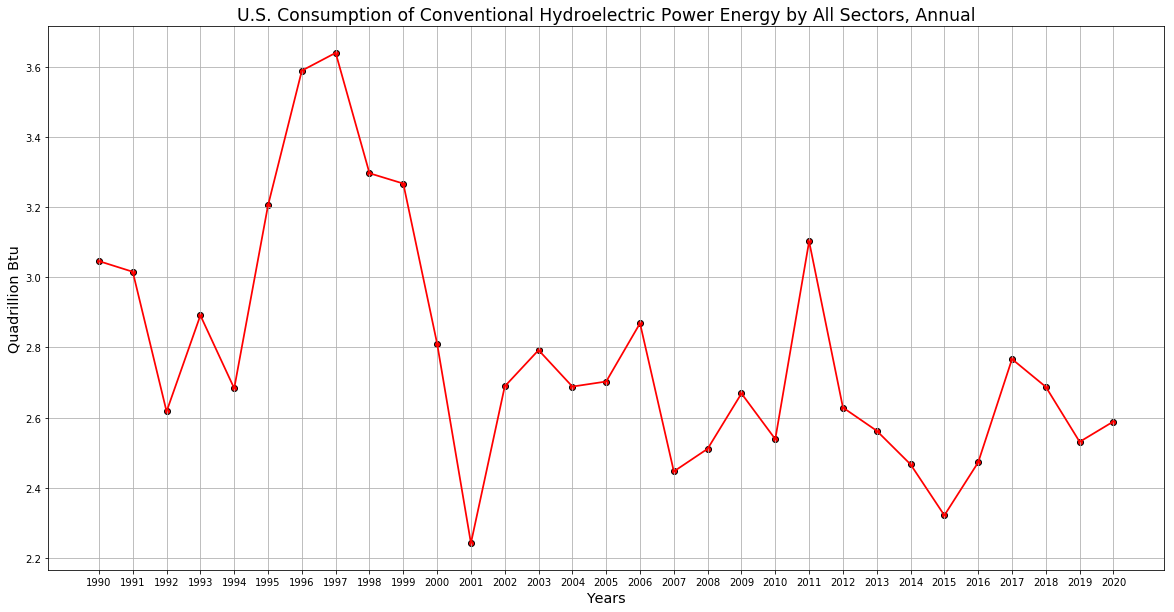

Hydroelectric energy was at its lowest consumption level in the US in 2001 with 2.241858478 quadrillion btu.
Hydroelectric energy was at its highest consumption level in the US in  2011 with 3.640457501 quadrillion btu.


In [11]:
# US Consumption of Conventional Hydroelectric Power Energy by All Sectors, Annual
# Set the size of the figure to fit 30 years of data
plt.figure(figsize=(20,10))

# Create a visual trend for the data
plt.scatter(years, hydroelectric, color="red", edgecolors="black")
plt.plot(years, hydroelectric, linewidth=1.75, color="red")
plt.title("U.S. Consumption of Conventional Hydroelectric Power Energy by All Sectors, Annual", fontsize="xx-large")
plt.ylabel("Quadrillion Btu", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.grid(True)

# Save Figure
plt.savefig("output/Hydroelectric Consumption.png")

# display the figure
plt.show()

# Print the lowest and highest consumption levels for petroleum and other liquid fuels
print(f"Hydroelectric energy was at its lowest consumption level in the US in {int(min_hydroelectric_consumption_year)} with {min_hydroelectric_consumption_value} quadrillion btu.")
print(f"Hydroelectric energy was at its highest consumption level in the US in  {int(max_hydroelectric_consumption_year)} with {max_hydroelectric_consumption_value} quadrillion btu.")


In [12]:
# US Consumption of Geothermal Energy by All Sectors, Annual
# URL for GET requests to retrieve
geothermal_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.GETCBUS.A"

In [13]:
# Print the response object to the console
print(requests.get(geothermal_url))

<Response [200]>


In [14]:
# Pretty Print the output of the JSON
response = requests.get(geothermal_url).json()
print(json.dumps(response, indent=2, sort_keys=True))

In [16]:
# US Consumption of Geothermal Energy by All Sectors, Annual
# Create lists to determine x and y axis for graphs
years = []
geothermal_consumption = []

# Add an element onto the end of the List of years
for x in response["series"][0]["data"]:
    years.append(x[0])
    geothermal_consumption.append(x[1])
    
# Reverse lists to show years in ascending order
years  = years[::-1]
geothermal = geothermal_consumption[::-1]

In [17]:
# Create a For Loop to calculate the annual percent change for Natural Gas
i = 0
percent_change_geothermal = []
for x in geothermal:
    if(i == 0):
        percent_change_geothermal.append(0)
    else:
        percent_change_geothermal.append( (x - geothermal[i-1])/ geothermal[i-1] * 100)
    i += 1

In [18]:
# Use Pandas to create a DataFrame displaying the values & annual percent change per year
geothermal_consumption_btu_df = pd.DataFrame({
    'Year': years,
    'Geothermal (Quads)': geothermal_consumption,
    '% Change': percent_change_geothermal
})
geothermal_consumption_btu_df.head()

,Year,Geothermal (Quads),% Change
0,1990,0.231304,0.000000
1,1991,0.230574,4.028482
2,1992,0.218169,0.604074
3,1993,0.210233,3.902945
4,1994,0.209604,-6.575843


In [19]:
# Export file as a CSV, without the Pandas index, but with the header
geothermal_consumption_btu_df.to_csv("resources/GeothermalConsumption.csv", index=False, header=True)

In [30]:
# Find the greatest annual percent change 
geothermal_consumption_btu_df.max()

Year                  2020.000000
Geothermal (Quads)       0.231304
% Change                 7.432755
dtype: float64

In [31]:
# Calculate the average annual percent change for the last 30 years
geothermal_consumption_btu_df.mean()

Year                  6.419997e+121
Geothermal (Quads)     1.894086e-01
% Change               1.051408e+00
dtype: float64

In [32]:
# Find minimum and maximum emissions for geothermal energy
min_geothermal_consumption_value = geothermal_consumption_btu_df["Geothermal (Quads)"].min()
min_geothermal_consumption_year = int(geothermal_consumption_btu_df[geothermal_consumption_btu_df["Geothermal (Quads)"]==min_geothermal_consumption_value].Year)
max_geothermal_consumption_value = geothermal_consumption_btu_df["Geothermal (Quads)"].max()
max_geothermal_consumption_year = int(geothermal_consumption_btu_df[geothermal_consumption_btu_df["Geothermal (Quads)"]==max_geothermal_consumption_value].Year)

print(f"Geothermal energy was at its lowest consumption level in the US in {int(min_geothermal_consumption_year)} with {min_geothermal_consumption_value} quadrillion btu.")
print(f"Geothermal energy was at its highest consumption level in the US in  {int(max_geothermal_consumption_year)} with {max_geothermal_consumption_value} quadrillion btu.")

# Find minimum and maximum annual percent change for geothermal energy
max_geothermal_consumption_delta= geothermal_consumption_btu_df["% Change"].max()
max_geothermal_consumption_year= int(geothermal_consumption_btu_df[geothermal_consumption_btu_df["% Change"]==max_geothermal_consumption_delta].Year)
min_geothermal_consumption_delta = geothermal_consumption_btu_df["% Change"].min()
min_geothermal_consumption_year = int(geothermal_consumption_btu_df[geothermal_consumption_btu_df["% Change"]==min_geothermal_consumption_delta].Year)

print(f"The largest percent increase in US geothermal energy consumption was {max_geothermal_consumption_delta}% in {max_geothermal_consumption_year}.")
print(f"The largest percent decrease in US geothermal energy consumption was {min_geothermal_consumption_delta}% in {min_geothermal_consumption_year}.")

# find the total geothermal consumption over the last thirty years
geothermal_total_consumption = geothermal_consumption_btu_df["Geothermal (Quads)"].sum()
print(f"By 2020, The US will have consumed approximately {geothermal_total_consumption} quadrillion btus of geothermal energy since 1990.")

Geothermal energy was at its lowest consumption level in the US in 2015 with 0.152056598 quadrillion btu.
Geothermal energy was at its highest consumption level in the US in  1990 with 0.2313037 quadrillion btu.
The largest percent increase in US geothermal energy consumption was 7.432755400722573% in 1996.
The largest percent decrease in US geothermal energy consumption was -12.340985997343907% in 1995.
By 2020, The US will have consumed approximately 5.871666001 quadrillion btus of geothermal energy since 1990.


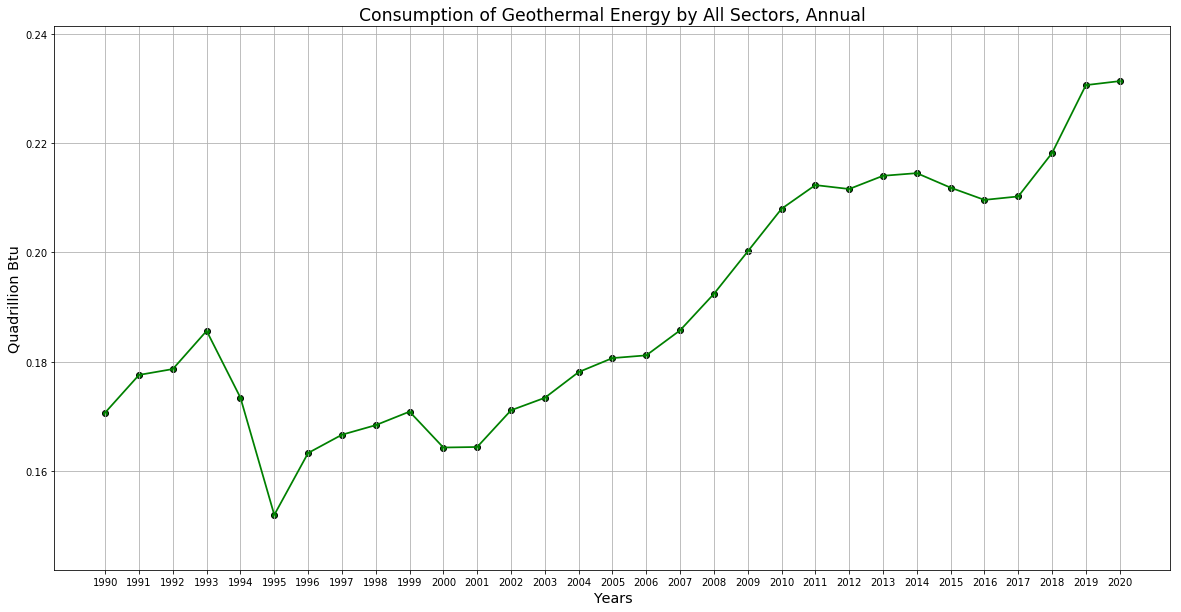

Geothermal energy was at its lowest consumption level in the US in 1995 with 0.152056598 quadrillion btu.
Geothermal energy was at its highest consumption level in the US in  1996 with 0.2313037 quadrillion btu.


In [33]:
# Set the size of the figure to fit 30 years of data
# Set the size of the figure to fit 30 years of data
plt.figure(figsize=(20,10))

# Create a visual for the data
plt.scatter(years, geothermal, color="green", edgecolors="black")
plt.plot(years, geothermal, color="green", linewidth=1.75)
plt.title("Consumption of Geothermal Energy by All Sectors, Annual", fontsize="xx-large")
plt.ylabel("Quadrillion Btu", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.grid(True)

# Save Figure
plt.savefig("output/Geothermal Consumption.png")

# display the figure
plt.show()

# Print the calculations for highest and lowest conumption levels 
print(f"Geothermal energy was at its lowest consumption level in the US in {int(min_geothermal_consumption_year)} with {min_geothermal_consumption_value} quadrillion btu.")
print(f"Geothermal energy was at its highest consumption level in the US in  {int(max_geothermal_consumption_year)} with {max_geothermal_consumption_value} quadrillion btu.")


In [34]:
# Electric Power Sector Large-Scale Solar Net Summer Capacity, Annual
# URL for GET requests to retrieve
solar_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.SOTCBUS.A"

In [35]:
# Print the response object to the console
print(requests.get(solar_url))

<Response [200]>


In [36]:
# Pretty Print the output of the JSON
response = requests.get(solar_url).json()
print(json.dumps(response, indent=2, sort_keys=True))

{
  "request": {
    "command": "series",
    "series_id": "STEO.SOTCBUS.A"
  },
  "series": [
    {
      "copyright": "None",
      "data": [
        [
          "2020",
          1.2679323
        ],
        [
          "2019",
          1.075344
        ],
        [
          "2018",
          0.953228152
        ],
        [
          "2017",
          0.774465814
        ],
        [
          "2016",
          0.568665177
        ],
        [
          "2015",
          0.425726674
        ],
        [
          "2014",
          0.336939161
        ],
        [
          "2013",
          0.224523132
        ],
        [
          "2012",
          0.156848746
        ],
        [
          "2011",
          0.111128539
        ],
        [
          "2010",
          0.090482912
        ],
        [
          "2009",
          0.077653809
        ],
        [
          "2008",
          0.073813602
        ],
        [
          "2007",
          0.075657103
        ],
       

In [37]:
# Electric Power Sector Large-Scale Solar Net Summer Capacity, Annual
# Create lists to determine x and y axis for graphs
years = []
solar_consumption = []

# Add an element onto the end of the List of years
for x in response["series"][0]["data"]:
    years.append(x[0])
    solar_consumption.append(x[1])
    
# Reverse lists to show years in ascending order
years  = years[::-1]
solar = solar_consumption[::-1]

In [38]:
# Create a For Loop to calculate the annual percent change for Natural Gas
i = 0
percent_change_solar = []
for x in solar:
    if(i == 0):
        percent_change_solar.append(0)
    else:
        percent_change_solar.append( (x - solar[i-1])/ solar[i-1] * 100)
    i += 1

In [39]:
# Use Pandas to create a DataFrame displaying the years, values and annual percent change per year
solar_consumption_btu_df = pd.DataFrame({
    'Year': years,
    'Solar (Quads)': solar_consumption,
    '% Change': percent_change_solar
})
solar_consumption_btu_df.head()

,Year,Solar (Quads),% Change
0,1990,1.267932,0.000000
1,1991,1.075344,4.937309
2,1992,0.953228,2.121059
3,1993,0.774466,3.743426
4,1994,0.568665,3.090801


In [40]:
#  Export file as a CSV, without the Pandas index, but with the header
solar_consumption_btu_df.to_csv("resources/SolarConsumption.csv", index=False, header=True)

In [41]:
solar_consumption_btu_df.max()

Year             2020.000000
Solar (Quads)       1.267932
% Change           50.068796
dtype: float64

In [42]:
# Calculate the average annual percent change for the last 30 years
solar_consumption_btu_df.mean()

Year             6.419997e+121
Solar (Quads)     2.363787e-01
% Change          1.134803e+01
dtype: float64

In [43]:
# Find minimum and maximum consumption levels for solar energy
min_solar_consumption_value = solar_consumption_btu_df["Solar (Quads)"].min()
min_solar_consumption_year = int(solar_consumption_btu_df[solar_consumption_btu_df["Solar (Quads)"]==min_solar_consumption_value].Year)
max_solar_consumption_value = solar_consumption_btu_df["Solar (Quads)"].max()
max_solar_consumption_year = int(solar_consumption_btu_df[solar_consumption_btu_df["Solar (Quads)"]==max_solar_consumption_value].Year)

print(f"Solar energy will be at its lowest consumption level in the U.S. in {int(min_solar_consumption_year)} with {min_solar_consumption_value} quadrillion btu.")
print(f"Solar energy was at its highest consumption level in the U.S. in  {int(max_solar_consumption_year)} with {max_solar_consumption_value} quadrillion btu.")

# Find minimum and maximum annual percent change for US solar energy consumption
max_solar_consumption_delta= solar_consumption_btu_df["% Change"].max()
max_solar_consumption_year= int(solar_consumption_btu_df[solar_consumption_btu_df["% Change"]==max_solar_consumption_delta].Year)
min_solar_consumption_delta = solar_consumption_btu_df["% Change"].min()
min_solar_consumption_year = int(solar_consumption_btu_df[solar_consumption_btu_df["% Change"]==min_solar_consumption_delta].Year)

print(f"The largest percent increase in U.S. geothermal energy consumption was {max_solar_consumption_delta}% in {max_solar_consumption_year}.")
print(f"The largest percent decrease in U.S. geothermal energy consumption was {min_solar_consumption_delta}% in {min_solar_consumption_year}.")

# find the solar geothermal consumption over the last thirty years
solar_total_consumption = solar_consumption_btu_df["Solar (Quads)"].sum()
print(f"By 2020, The U.S. will have consumed approximately {solar_total_consumption} quadrillion btus of solar energy since 1990.")

Solar energy will be at its lowest consumption level in the U.S. in 2020 with 0.059419783 quadrillion btu.
Solar energy was at its highest consumption level in the U.S. in  1990 with 1.2679323 quadrillion btu.
The largest percent increase in U.S. geothermal energy consumption was 50.06879602944431% in 2014.
The largest percent decrease in U.S. geothermal energy consumption was -3.4587188554373554% in 2000.
By 2020, The U.S. will have consumed approximately 7.327738824000001 quadrillion btus of solar energy since 1990.


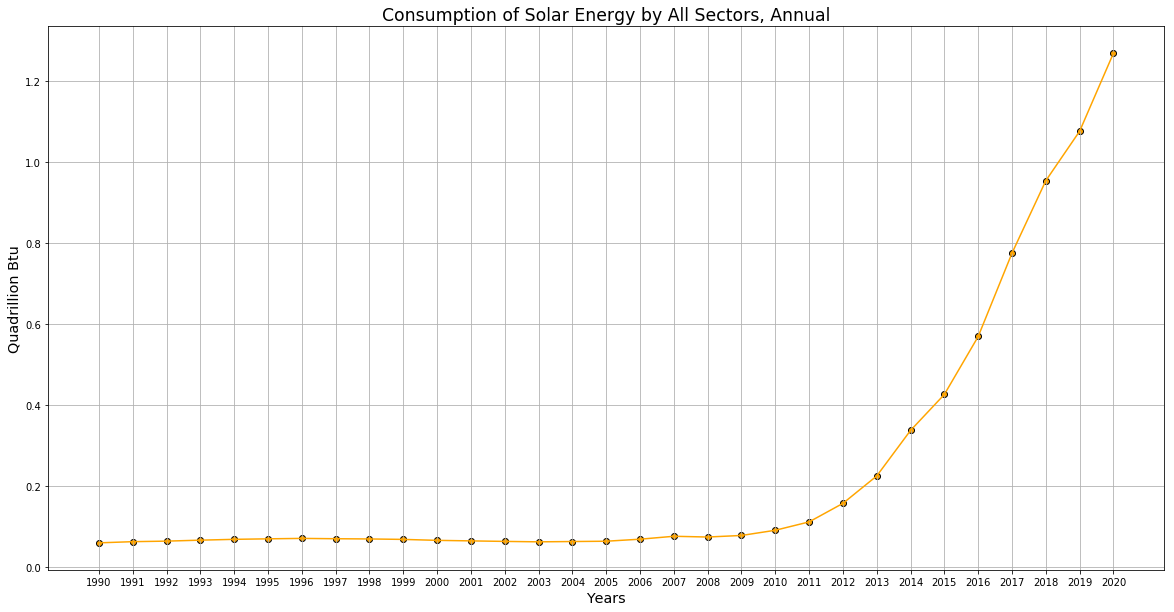

Solar energy will be at its lowest consumption level in the U.S. in 2000 with 0.059419783 quadrillion btu.
Solar energy was at its highest consumption level in the U.S. in  2014 with 1.2679323 quadrillion btu.


In [45]:
# Electric Power Sector Large-Scale Solar Net Summer Capacity, Annual
# Set the size of the figure to fit 30 years of data
plt.figure(figsize=(20,10))
# # Create a visual for the data
plt.scatter(years, solar, color="orange", edgecolors="black")
plt.plot(years, solar, color="orange")
plt.title("Consumption of Solar Energy by All Sectors, Annual", fontsize="xx-large")
plt.ylabel("Quadrillion Btu", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.grid(True)

# Save Figure
plt.savefig("output/Solar Consumption.png")

# display the figure
plt.show()

# Print the highest and lowest consumption levels beneath the line graph
print(f"Solar energy will be at its lowest consumption level in the U.S. in {int(min_solar_consumption_year)} with {min_solar_consumption_value} quadrillion btu.")
print(f"Solar energy was at its highest consumption level in the U.S. in  {int(max_solar_consumption_year)} with {max_solar_consumption_value} quadrillion btu.")


In [46]:
# Electric Power Sector Large-Scale Wind Net Summer Capacity, Annual
# URL for GET requests to retrieve U.S. Wind Net Summer Capacity, Annual
wind_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.WNTCBUS.A"

In [47]:
# Print the response object to the console
print(requests.get(wind_url))

<Response [200]>


In [48]:
# Pretty Print the output of the JSON
response = requests.get(wind_url).json()
print(json.dumps(response, indent=2, sort_keys=True))

{
  "request": {
    "command": "series",
    "series_id": "STEO.WNTCBUS.A"
  },
  "series": [
    {
      "copyright": "None",
      "data": [
        [
          "2020",
          3.2497359
        ],
        [
          "2019",
          2.899677
        ],
        [
          "2018",
          2.5356239621
        ],
        [
          "2017",
          2.3456110303
        ],
        [
          "2016",
          2.0937279855
        ],
        [
          "2015",
          1.7757054845
        ],
        [
          "2014",
          1.7260260421
        ],
        [
          "2013",
          1.6004236409
        ],
        [
          "2012",
          1.3393646844
        ],
        [
          "2011",
          1.1670944041
        ],
        [
          "2010",
          0.92327053466
        ],
        [
          "2009",
          0.72112661688
        ],
        [
          "2008",
          0.54554798858
        ],
        [
          "2007",
          0.34050308268
  

In [49]:
# Electric Power Sector Large-Scale Solar Net Summer Capacity, Annual
# Create lists to determine x and y axis for graphs
years = []
wind_consumption = []

# Add an element onto the end of the List of years
for x in response["series"][0]["data"]:
    years.append(x[0])
    wind_consumption.append(x[1])
    
# Reverse lists to show years in ascending order
years  = years[::-1]
wind = wind_consumption[::-1]

In [50]:
# Create a For Loop to calculate the annual percent change for Wind Consumption
i = 0
percent_change_wind = []
for x in wind:
    if (i == 0):
        percent_change_wind.append(0)
    else:
        percent_change_wind.append( (x - wind[i-1])/ wind[i-1] * 100)
    i += 1

In [51]:
# Use Pandas to create a DataFrame displaying the annual percent change per year
wind_consumption_btu_df = pd.DataFrame({
    'Year': years,
    'Wind (Quads)': wind_consumption,
    '% Change': percent_change_wind
})
wind_consumption_btu_df.head()

,Year,Wind (Quads),% Change
0,1990,3.249736,0.000000
1,1991,2.899677,6.167845
2,1992,2.535624,-3.030776
3,1993,2.345611,3.764914
4,1994,2.093728,14.758756


In [52]:
# Calculate the average values over the last thirty years
wind_consumption_btu_df.mean()

Year            6.419997e+121
Wind (Quads)     7.911678e-01
% Change         1.761974e+01
dtype: float64

In [53]:
# Find minimum and maximum consumption levels for wind energy
min_wind_consumption_value = wind_consumption_btu_df["Wind (Quads)"].min()
min_wind_consumption_year = int(wind_consumption_btu_df[wind_consumption_btu_df["Wind (Quads)"]==min_wind_consumption_value].Year)
max_wind_consumption_value = wind_consumption_btu_df["Wind (Quads)"].max()
max_wind_consumption_year = int(wind_consumption_btu_df[wind_consumption_btu_df["Wind (Quads)"]==max_wind_consumption_value].Year)

print(f"Wind energy will be at its lowest consumption level in the U.S. in {int(min_wind_consumption_year)} with {min_wind_consumption_value} quadrillion btu.")
print(f"Wind energy was at its highest consumption level in the U.S. in  {int(max_wind_consumption_year)} with {max_wind_consumption_value} quadrillion btu.")

# Find minimum and maximum annual percent change for US wind energy consumption
max_wind_consumption_delta= wind_consumption_btu_df["% Change"].max()
max_wind_consumption_year= int(wind_consumption_btu_df[wind_consumption_btu_df["% Change"]==max_wind_consumption_delta].Year)
min_wind_consumption_delta = wind_consumption_btu_df["% Change"].min()
min_wind_consumption_year = int(wind_consumption_btu_df[wind_consumption_btu_df["% Change"]==min_wind_consumption_delta].Year)

print(f"The largest percent increase in U.S. geothermal energy consumption was {max_wind_consumption_delta}% in {max_wind_consumption_year}.")
print(f"The largest percent decrease in U.S. geothermal energy consumption was {min_wind_consumption_delta}% in {min_wind_consumption_year}.")

# find the solar wind consumption over the last thirty years
wind_total_consumption = wind_consumption_btu_df["Wind (Quads)"].sum()
print(f"By 2020, The U.S. will have consumed approximately {wind_total_consumption} quadrillion btus of wind energy since 1990.")

Wind energy will be at its lowest consumption level in the U.S. in 2020 with 0.029007016732 quadrillion btu.
Wind energy was at its highest consumption level in the U.S. in  1990 with 3.2497359 quadrillion btu.
The largest percent increase in U.S. geothermal energy consumption was 60.21822307338647% in 2008.
The largest percent decrease in U.S. geothermal energy consumption was -8.241195512377436% in 1995.
By 2020, The U.S. will have consumed approximately 24.526202275515 quadrillion btus of wind energy since 1990.


In [54]:
#  Export file as a CSV, without the Pandas index, but with the header
wind_consumption_btu_df.to_csv("resources/WindConsumption.csv", index=False, header=True)

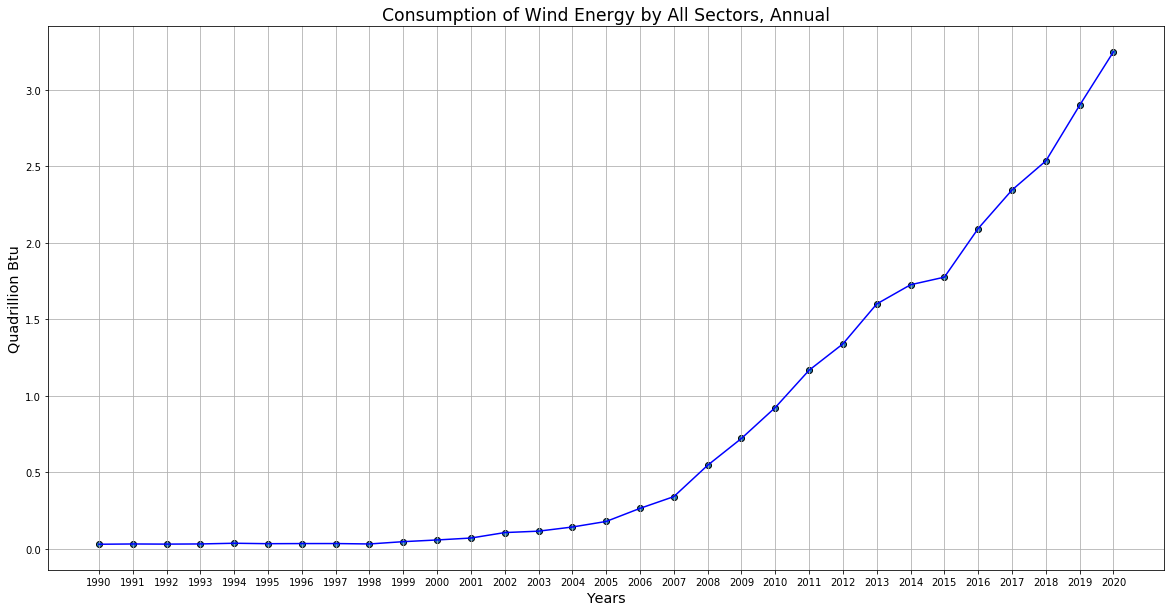

Wind energy will be at its lowest consumption level in the U.S. in 1995 with 0.029007016732 quadrillion btu.
Wind energy was at its highest consumption level in the U.S. in  2008 with 3.2497359 quadrillion btu.


In [55]:
# Electric Power Sector Wind Net Summer Capacity, Annual
# Set the size of the figure to fit 30 years of data
plt.figure(figsize=(20,10))
# Create a visual for the data
plt.scatter(years, wind, edgecolors="black")
plt.plot(years,wind, color = "blue")
plt.title("Consumption of Wind Energy by All Sectors, Annual", fontsize="xx-large")
plt.ylabel("Quadrillion Btu", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.grid(True)

# Save Figure
plt.savefig("output/Wind Cosumption.png")

# Display the figure
plt.show()

# Print the highest and lowest consumption levels beneath the line graph
print(f"Wind energy will be at its lowest consumption level in the U.S. in {int(min_wind_consumption_year)} with {min_wind_consumption_value} quadrillion btu.")
print(f"Wind energy was at its highest consumption level in the U.S. in  {int(max_wind_consumption_year)} with {max_wind_consumption_value} quadrillion btu.")


In [56]:
# Compare renewables with one another
# Create variables and set them as Lists
renewable_urls = []
renewable_consumption_btu = []
renewable_years = []
i = 0

# Append each API
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.HVTCBUS.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.GETCBUS.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.SOTCBUS.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.WNTCBUS.A")

# Create a For loop which will print the response object to the console, and append each list
for renewables in renewable_urls:
    renewable_response = requests.get(renewables).json()
    renewable_consumption_btu.append([])
    renewable_years.append([])
    for response in renewable_response["series"][0]["data"]:
        renewable_years[i].append(response[0])
    renewable_consumption_btu[i] = renewable_consumption_btu[i][::-1]
    renewable_years[i] = renewable_years[i][::-1]
    i += 1

In [57]:
# Initializing a vertical line for Compiled Renewable Energy Graph
x_lim = 1 * np.pi
x_axis = np.arange(0, x_lim, 2.0)
sin = np.sin(x_axis)

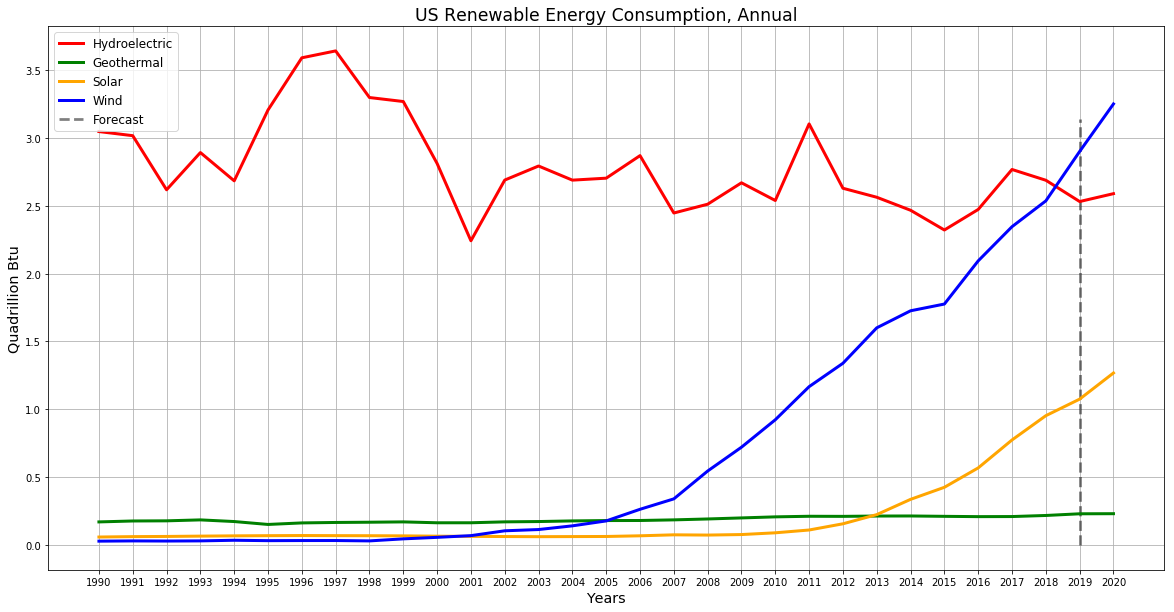

In [58]:
# US Renewable Energy Consumption
# Set the size of the figure to fit 30 years of data
plt.figure(figsize=(20,10))

# # Create a visual for the combined data
plt.plot(years, hydroelectric, label="Hydroelectric", color="red", linewidth=3.0)
plt.plot(years, geothermal, label="Geothermal", color ="green", linewidth=3.0)
plt.plot(years, solar, label="Solar", color="orange", linewidth=3.0)
plt.plot(years, wind, label="Wind", color="blue", linewidth=3.0)
plt.title("US Renewable Energy Consumption, Annual", fontsize="xx-large")
plt.ylabel("Quadrillion Btu", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.legend(loc='best', frameon=True, fancybox=True, fontsize="x-large")
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.grid(True)

# Save Figure
plt.savefig("output/Renewable Energy Consumption_Line.png")

# Create a forecast line
plt.vlines(29, 0, x_lim, alpha=0.5, label="Forecast", linestyles="--", linewidth=2.75)
plt.legend()

# Display the figure
plt.show()


In [59]:
# Create Renewable Consumption DataFrame using list of dictionaries method
renewable_consumption_btu_df = pd.DataFrame({
    'Year': years,
    'Hydroelectric': hydroelectric,
    'Wind': wind,
    'Geothermal': geothermal,
    'Solar': solar,
})
# Show DataFrame
renewable_consumption_btu_df.head()

,Year,Hydroelectric,Wind,Geothermal,Solar
0,1990,3.046391,0.029007,0.170747,0.059420
1,1991,3.015943,0.030796,0.177626,0.062354
2,1992,2.617436,0.029863,0.178699,0.063676
3,1993,2.891613,0.030987,0.185673,0.066060
4,1994,2.683457,0.035560,0.173464,0.068102


In [60]:
#  Export file as a CSV, without the Pandas index, but with the header
renewable_consumption_btu_df.to_csv("resources/USRenewableConsumption.csv", index=False, header=True)

In [64]:
# Initialize variable so x-axis displays year values
renewable_consumption_btu_df = renewable_consumption_btu_df.set_index("Year")

KeyError: 'Year'

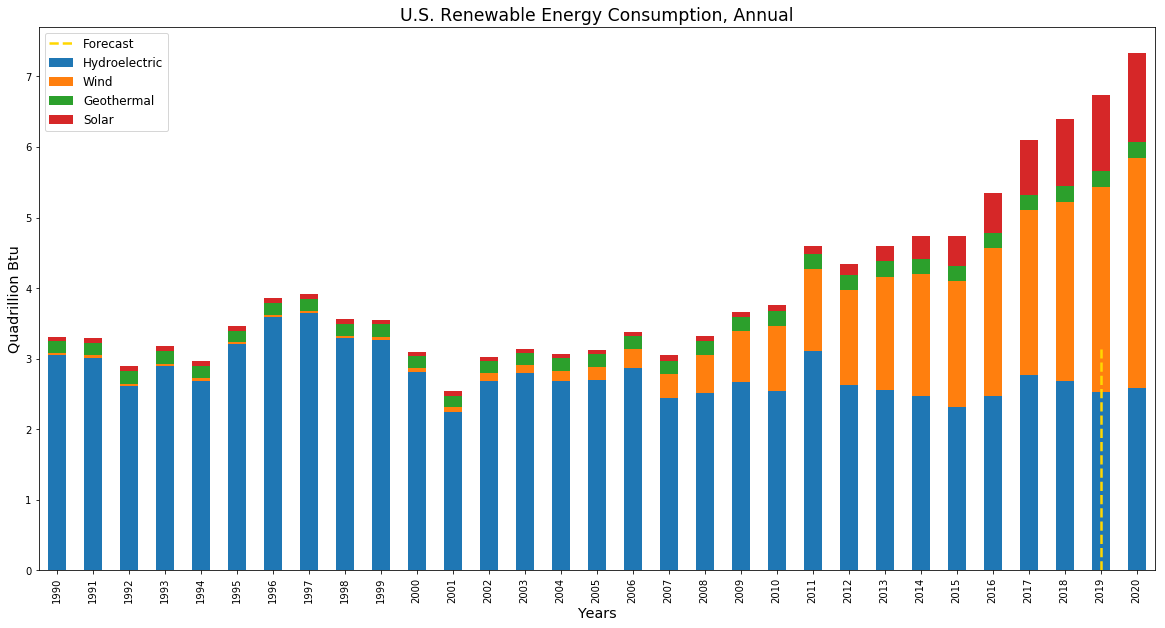

In [68]:
# Alternative visual to line graph
# Initialize variable for bar graph of consumption data
ax = renewable_consumption_btu_df.plot(kind='bar', stacked=True, figsize=(20,10), title = 'US Renewable Energy Consumption')

# Prepare and Create Stacked Bar Graph
ax.set_title("U.S. Renewable Energy Consumption, Annual", fontsize="xx-large")
ax.set_ylabel("Quadrillion Btu", fontsize="x-large")
ax.set_xlabel("Years", fontsize="x-large")
# ax.figtext(x, y, z, *args, **kwargs)
ax.legend(loc='upper left', frameon=True, fancybox=True, fontsize="x-large")
plt.vlines(29, 0, x_lim, alpha=1.0, linestyles="--", label="Forecast", linewidth=2.5, color="gold")
plt.legend()
ax.grid
ax

# Save Figure
plt.savefig("output/Renewable Energy Consumption_StackedBar.png")

# Display the figure
plt.show()

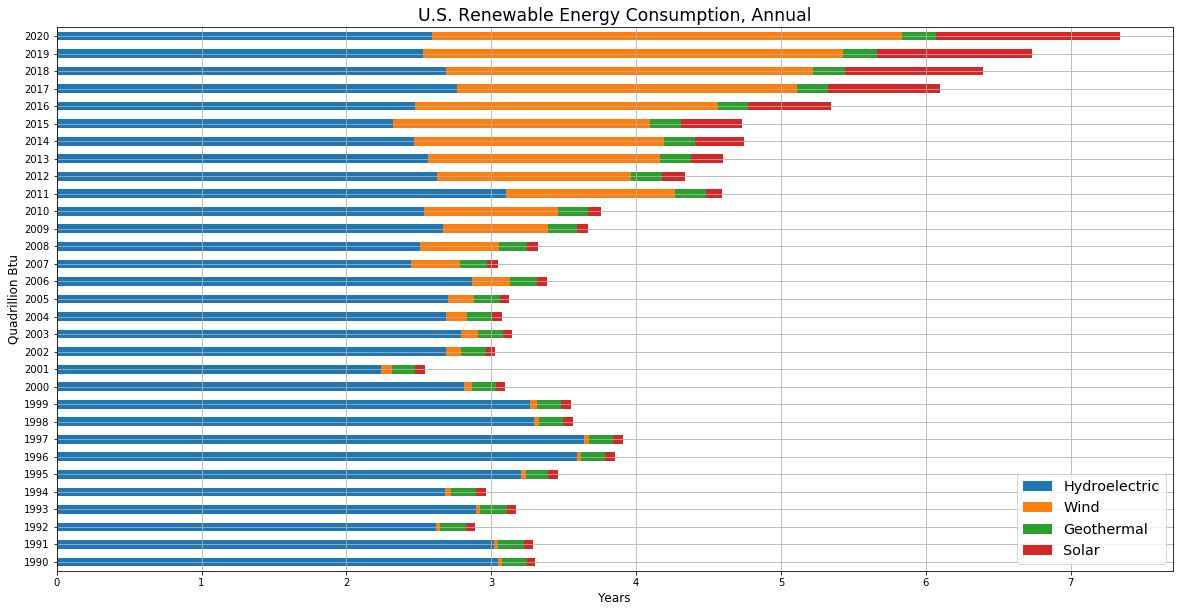

In [67]:
# Another visual aid to present the data...
# Initialize variable for horizontal graph of consumption data
axh = renewable_consumption_btu_df.plot(kind='barh', stacked=True, figsize=(20,10), title = 'US Renewable Energy Consumption')

axh.set_title("U.S. Renewable Energy Consumption, Annual", fontsize="xx-large")
axh.set_ylabel("Quadrillion Btu", fontsize="large")
axh.set_xlabel("Years", fontsize="large")
axh.legend(loc='lower right', frameon=True, fancybox=True, fontsize="x-large")
axh.grid(True)
axh

In [ ]:
# Get total renewables by type
total_consumption_renewables = (hydroelectric_total_consumption + geothermal_total_consumption + solar_total_consumption + wind_total_consumption)

# Build Pie Chart
sizes = [((hydroelectric_total_consumption / total_consumption_renewables) * 100) , ((geothermal_total_consumption / total_consumption_renewables) * 100) , ((solar_total_consumption / total_consumption_renewables) * 100), ((wind_total_consumption/total_consumption_renewables) * 100)]
labels = ["Hydroelectric", "Geothermal", "Wind", "Solar"]
colors = ["red", "green", "blue", "orange"]
explode = [0.1,0,0,0]

plt.pie(sizes, explode =explode, colors = colors , shadow = True , autopct="%1.1f%%", pctdistance=1.3)
plt.title('U.S. Consumption of Renewable Energy From 1990 - Present')
plt.legend(labels,
          title="Renewable Types",
          loc="best",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Save Figure
plt.savefig("output/RenewableConsumption_pie.png")

# Display the figure
plt.show()

In [ ]:
# US Consumption Data
fossilfuel_consumption = "Resources/FossilFuelConsumption.csv"
renewable_consumption = "Resources/USRenewableConsumption.csv"
fossilfuel_consumption_df = pd.read_csv(fossilfuel_consumption)
renewable_consumption_df = pd.read_csv(renewable_consumption)
renewable_consumption_df.head()

In [ ]:
USconsumption_combined_df=pd.merge(fossilfuel_consumption_df, renewable_consumption_df, on="Year")
USconsumption_combined_df.head()

In [70]:
# Export file as a CSV, without the Pandas index, but with the header
# USconsumption_combined_df.to_csv("resources/USconsumption_combined.csv", index=False, header=True)